In [1]:
#Necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import os
import cv2
from scipy import ndimage

print("test1")

# Loading the dataset and performing train/test split
# Replacing the placeholder paths with the actual paths to our dataset..
nameofclass = "astilbe" 
assignment_path = "C:/Users/encse/OneDrive/Masaüstü/MachineLearning/Assignment2"
train_images_path = "./flowers/train/" + nameofclass
test_images_path = "./flowers/test/" + nameofclass
train_images_Output= "./Outputs/train/" + nameofclass+"/"
desired_width = 32
desired_height = 32

# Function for resizing and some image proccessing operations on the images
def resize_image(input_path, label2, width, height, images, Image_Normal, imagesRgb, imagesCannyEdge):
    
    # Reading the input images
    image = cv2.imread(input_path)
    image = cv2.resize(image, (width, height))
    # Canny edge applying function is called.
    imageCannyEdge = canny_edge_detection(image)
    imageCannyEdge = (np.mean(imageCannyEdge))
    imagesCannyEdge.append(imageCannyEdge)
    # Changing the color space.
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imagesRgb.append(np.mean(rgb_image))
    Image_Normal.append((image))
    
    frequency = 0.6
    theta = 0
    sigma = 1

    # Laplacian filter application
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    images.append((np.mean(laplacian)))


    """
    # Saves the resized image (Will be commented out)
     cv2.imwrite(train_images_Output+"canny/"+ label2+'.jpg', imageCannyEdge)
     cv2.imwrite(train_images_Output+"rgb/"+ label2+'.jpg', rgb_image)
    """
    
# Function that performs "Canny Edge Detection"
def canny_edge_detection(image):
    # First, Converts the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applies GaussianBlur to reduce noise and help the edge detection
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection at last..
    edges = cv2.Canny(blurred_image, 50, 150)

    return edges

# Function that applies "Gabor" filter
def apply_gabor_filter(image, frequency, theta=0, sigma=1):
    gabor_filter_real = cv2.getGaborKernel((5, 5), sigma, theta, 1, 0, ktype=cv2.CV_32F)
    gabor_filter_imag = cv2.getGaborKernel((5, 5), sigma, theta, 1, 0.5, ktype=cv2.CV_32F)

    filtered_real = ndimage.convolve(image, gabor_filter_real)
    filtered_imag = ndimage.convolve(image, gabor_filter_imag)

    magnitude = np.sqrt(filtered_real**2 + filtered_imag**2)

    return magnitude


"""
import cv2

    def resize_image(input_path, output_path, width, height):
     # Read the input image
     image = cv2.imread(input_path)

     # Resize the image
     resized_image = cv2.resize(image, (width, height))

     # Save the resized image
     cv2.imwrite(output_path, resized_image)

 if __name__ == "__main__":
     # Input and output file paths
     input_image_path = "path/to/your/input/image.jpg"
     output_image_path = "path/to/your/output/resized_image.jpg"

     # Specify the desired width and height
     desired_width = 500
     desired_height = 300

     # Resize the image
     resize_image(input_image_path, output_image_path, desired_width, desired_height)

     print("Image resized successfully.")
"""

# Empty lists are defined for labels and different types of image features
test_labels = []
train_labels = []

Train_Laplacian = []
Tree_Laplacian = []

Train_RGB = []
Test_RGB = []

Train_CannyEdge = []
Test_CannyEdge = []

# Function for calculating the average pixel values..
def calculate_average_pixels(images):
    return np.mean(images, axis=0)

# Function for loading our dataset from multiple paths
def load_dataset(images_path, imagesPath2, imagesPath3, imagesPath4, imagesPath5, imagesPath6, imagesPath7, imagesPath8, imagesPath9, imagesPath10, images, labels, imagesRgb, imagesCannyEdge, limit):

    # Counter to keep track of each iteration
    iteration_count = 0   
    print(images_path)
    Image_Normal = []
    
    # This part loops through each path and reads the images, resizes them, and appends to respective lists.

    for file in os.listdir(images_path):
        # Using the class name as the label
        label = file.split("_")[0] 
        label2 = label
        # Conversion of the label to an integer (if needed)
        label = int(label)  
        image_path = os.path.join(images_path, file)
        resize_image(image_path, label2, desired_width, desired_height, images, Image_Normal, imagesRgb, imagesCannyEdge)
        labels.append(0)
        iteration_count += 1
        # This if block checks whether the limit is reached or not
        if iteration_count >= limit:
            break
    iteration_count = 0   
    print(imagesPath2)

    #Same (for loop) code block will be repeated for each class.
    
    for file in os.listdir(imagesPath2):
        label = file.split("_")[0] 
        label2=label
        label = int(label)
        image_path = os.path.join(imagesPath2, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(1)
        iteration_count += 1
        if iteration_count >= limit:
            break
    iteration_count = 0   
    print(imagesPath3)
    
    for file in os.listdir(imagesPath3):
        label = file.split("_")[0]  
        label2=label
        label = int(label) 
        image_path = os.path.join(imagesPath3, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(2)
        iteration_count += 1
        if iteration_count >= limit:
            break
    iteration_count = 0   
    print(imagesPath4)
    
    for file in os.listdir(imagesPath4):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  
        image_path = os.path.join(imagesPath4, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(3)
        iteration_count += 1
        if iteration_count >= limit:
            break
    iteration_count = 0   
    print(imagesPath5)
    
    for file in os.listdir(imagesPath5):
        label = file.split("_")[0]
        label2=label
        label = int(label)
        image_path = os.path.join(imagesPath5, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(4)
        iteration_count += 1
        if iteration_count >= limit:
            break    
    iteration_count = 0   
    print(imagesPath6)
    
    for file in os.listdir(imagesPath6):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  
        image_path = os.path.join(imagesPath6, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(5)
        iteration_count += 1
        if iteration_count >= limit:
            break    
    iteration_count = 0   
    print(imagesPath7)
    
    for file in os.listdir(imagesPath7):
        label = file.split("_")[0]  
        label2=label
        label = int(label) 
        image_path = os.path.join(imagesPath7, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(6)
        iteration_count += 1
        if iteration_count >= limit:
            break
    iteration_count = 0   
    print(imagesPath8)
    
    for file in os.listdir(imagesPath8):
        label = file.split("_")[0]
        label2=label
        label = int(label)
        image_path = os.path.join(imagesPath8, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(7)
        iteration_count += 1
        if iteration_count >= limit:
            break    
    iteration_count = 0   
    print(imagesPath9)
    
    for file in os.listdir(imagesPath9):
        label = file.split("_")[0]
        label2=label
        label = int(label) 
        image_path = os.path.join(imagesPath9, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(8)
        iteration_count += 1
        if iteration_count >= limit:
            break    
    iteration_count = 0   
    print(imagesPath10)
    
    for file in os.listdir(imagesPath10):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  
        image_path = os.path.join(imagesPath10, file)
        resize_image(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)
        labels.append(9)
        iteration_count += 1
        if iteration_count >= limit:
            break    
        
            
    return images, labels

    for root, dirs, files in os.walk(images_path):

        for file in files:
            # Assuming image names are in the format "label_image_number.jpg"
            label = file.split("_")[0]  # Extract the label from the filename
            label = int(label)  # Convert the label to an integer if needed

            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)  # Use OpenCV to read the image
            images.append(image)
            labels.append(label)
            # You may need to resize or preprocess the image based on your requirements
            resize_image(images_path, train_images_Output, desired_width, desired_height)
         

    return images, labels


# Loading our training data
train_images, train_labels = load_dataset("./flowers/train/astilbe","./flowers/train/bellflower","./flowers/train/carnation","./flowers/train/daisy","./flowers/train/dandelion","./flowers/train/iris","./flowers/train/rose","./flowers/train/sunflower","./flowers/train/tulip","./flowers/train/water_lily",Train_Laplacian,train_labels,Train_RGB,Train_CannyEdge,30)
# Loading our test data
test_images, test_labels = load_dataset("./flowers/test/astilbe","./flowers/test/bellflower","./flowers/test/carnation","./flowers/test/daisy","./flowers/test/dandelion","./flowers/test/iris","./flowers/test/rose","./flowers/test/sunflower","./flowers/test/tulip","./flowers/test/water_lily",Tree_Laplacian,test_labels,Test_RGB,Test_CannyEdge,4)

print("test2")

test1
./flowers/train/astilbe
./flowers/train/bellflower
./flowers/train/carnation
./flowers/train/daisy
./flowers/train/dandelion
./flowers/train/iris
./flowers/train/rose
./flowers/train/sunflower
./flowers/train/tulip
./flowers/train/water_lily
./flowers/test/astilbe
./flowers/test/bellflower
./flowers/test/carnation
./flowers/test/daisy
./flowers/test/dandelion
./flowers/test/iris
./flowers/test/rose
./flowers/test/sunflower
./flowers/test/tulip
./flowers/test/water_lily
test2


This part of the assignment (above code block) is primarily focused on processing images for a classification task:

Libraries and Initial Setup: The code imports necessary libraries like numpy, OpenCV (cv2), and other modules to handle image processing tasks. It then initializes paths for input and output directories and defines the desired image width and height.

Image Processing Functions:

1) resize_image: This function resizes the input image to the specified dimensions, applies some filters, and changes the color space. Within this function, it computes various image features such as Canny edge detection, RGB conversion, and Laplacian filtering. (It also saves the processed images but is currently commented out.) 

Resizing images to 32x32 dimensions facilitates uniformity, enhances computational efficiency, and simplifies preprocessing, contributing to streamlined image analysis and machine learning tasks.

Converting images to the RGB color space presents a standardized representation and simplifies the interpretation of color information. By breaking down images into their red, green, and blue components, RGB facilitates intuitive visualization and compatibility with numerous image processing tools and algorithms. This color space also enables the exploration of color patterns and distributions, offering added insights into image characteristics that may be crucial for specific analysis tasks, thereby contributing significantly to comprehensive image analysis and processing.

Laplacian filtering in image processing is advantageous for edge enhancement, enabling better edge detection by highlighting areas of rapid intensity changes. It also aids in feature extraction, reducing noise, and sharpening images, contributing to clearer and more refined visual details within the image.

2) canny_edge_detection: A function to perform Canny edge detection on the image. Applying Canny edge detection to images offers us a lot of fundamental advantages in image analysis. It precisely identifies boundaries by detecting abrupt intensity changes, providing crucial information about object edges. This technique not only reduces noise through Gaussian blurring but also simplifies subsequent analysis by extracting essential structural details. These edges serve as vital features for object recognition and segmentation, contributing to enhanced accuracy in various computer vision tasks. 

3) apply_gabor_filter: A function to apply Gabor filter on an image. Gabor filters in image processing offer unique benefits by capturing both spatial and frequency traits, serving as robust tools for feature extraction. They excel in recognizing textures across scales and orientations, revealing detailed image elements like edges, contours, and textures. With their capacity to analyze texture variations, they're crucial in tasks such as fingerprint recognition, texture classification, and medical image analysis. Their adaptability in capturing complex visual data while maintaining directional focus is invaluable for intricate image analysis and pattern recognition.

Our code also includes a commented-out block that demonstrates how to resize a single image using OpenCV's resize function.

Data Loading and Processing:

1) load_dataset: This function loads images from multiple paths, resizes them, and appends various features (Laplacian, RGB, Canny Edge) to their respective lists. It iterates through each path, reads the images, and performs the required processing.

2) Dataset Loading: The code loads training and testing datasets using the load_dataset function, passing the paths for different classes. It appends images and labels to the respective lists for training and testing datasets.

First and Final Print Statements: Lastly, the code prints "test1" and "test2" to indicate the start and end of the execution respectively in order to guarentee code is running properly. They are currently commented out.

This block is prepared to handle the image preprocessing and dataset loading for a machine learning task, related to image classification.

In [2]:
#print("test3")

class Node:
    def __init__(self, feature_index=None, threshold=None, value=None, left=None, right=None):
        # Index of the feature to split on
        self.feature_index = feature_index
        # Threshold value for the split  
        self.threshold = threshold  
        # Class label for leaf nodes
        self.value = value 
        # Left subtree 
        self.left = left  
        # Right subtree
        self.right = right  

class DecisionTree:

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature_index, threshold):
        # Calculating information gain for a split
        parent_entropy = self.entropy(y)
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        # Avoiding the division by zero
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0  

        left_entropy = self.entropy(y[left_mask])
        right_entropy = self.entropy(y[right_mask])

        # Weighted average of child entropies
        child_entropy = (np.sum(left_mask) / len(y)) * left_entropy + (np.sum(right_mask) / len(y)) * right_entropy

        # Information gain is the reduction in entropy
        gain = parent_entropy - child_entropy
        return gain

    # This method finds the best split for a node
    def find_best_split(self, X, y):
        
        m, n = X.shape
        if m <= 1:
            return None, None

        parent_entropy = self.entropy(y)
        best_gain = 0
        best_feature_index = None
        best_threshold = None

        for feature_index in range(n):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature_index, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    #This method recursively build the decision tree.
    def build_tree(self, X, y, depth=0):
        # If the maximum depth is reached or the node is pure, create a leaf node
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.argmax(np.bincount(y)))

        feature_index, threshold = self.find_best_split(X, y)

        # If no split provides information gain, create a leaf node
        if feature_index is None:
            return Node(value=np.argmax(np.bincount(y)))

        left_mask = X[ : , feature_index] <= threshold
        right_mask = ~left_mask

        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return Node(feature_index=feature_index, threshold=threshold, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    #This method recursively predicts the class of a single sample
    def predict_single(self, node, sample):
        
        if node.value is not None:
            return node.value

        if sample[node.feature_index] <= node.threshold:
            return self.predict_single(node.left, sample)
        else:
            return self.predict_single(node.right, sample)
    
    #This method predicts the classes for multiple samples
    def predict(self, X):
        
        if self.tree is None:
            raise ValueError("The tree has not been trained. Call the fit method first.")
        return np.array([self.predict_single(self.tree, sample) for sample in X])

    #This method finds twigs (subtrees with only leaf nodes as children) in the decision tree starting from the given node.
    def find_twigs(self, node):
        
        twigs = []

        # Checking if both left and right child nodes exist and "they are both leaf nodes"
        if node.left is not None and node.right is not None:
            if node.left.left is None and node.left.right is None and node.right.left is None and node.right.right is None:
                twigs.append(node)
        # If "if" conditions for twigs are met, adds the current node as a twig
        
        # Recursively searchs for twigs in the left and right subtrees
        if node.left is not None:
            twigs.extend(self.find_twigs(node.left))
        if node.right is not None:
            twigs.extend(self.find_twigs(node.right))

        return twigs

    #This method Finds the twig (subtree) with the "least information gain" after pruning among the list of twigs.
    def find_least_gain_twig(self, twigs, X_val, y_val):
        least_gain_twig = None
        least_gain = float('inf')

        # Iteration through each twig and calculate information gain after pruning
        for twig in twigs:
            gain = self.information_gain_after_pruning(twig, X_val, y_val)
            # Keeps track of the twig with the least information gain
            if gain < least_gain:
                least_gain = gain
                least_gain_twig = twig

        return least_gain_twig

    # This method calculates information gain for a split after pruning
    def information_gain_after_pruning(self, twig, X_val, y_val):        
        
        if twig is None or twig.left is None or twig.right is None:
            return 0
        
        parent_entropy = self.entropy(y_val[twig.indices])

        left_mask = np.isin(X_val[:, twig.feature_index], twig.left.threshold)
        right_mask = ~left_mask

        left_child_indices = twig.left.indices
        right_child_indices = twig.right.indices

        left_child_entropy = self.entropy(y_val[left_child_indices])
        right_child_entropy = self.entropy(y_val[right_child_indices])

        # Weighted average calcuation of child entropies
        child_entropy = (np.sum(left_mask) / len(twig.indices)) * left_child_entropy + \
                        (np.sum(right_mask) / len(twig.indices)) * right_child_entropy

        # Information gain calculation, which is the reduction in entropy
        gain = parent_entropy - child_entropy
        return gain

    # This method is removing all child nodes of the twig
    def remove_twig(self, twig):
        
        twig.left = None
        twig.right = None

    # This method relabels the twig as a leaf (set majority of "Positive" or "Negative" as leaf value)
    def relabel_twig(self, twig, y_val):
        
        positive_count = np.sum(y_val[twig.indices] == 1)
        negative_count = np.sum(y_val[twig.indices] == 0)

        if positive_count >= negative_count:
            twig.value = 1
        else:
            twig.value = 0

    # This method revert the changes made to the twig
    def revert_changes(self, twig):
        
        twig.left = twig.left_backup
        twig.right = twig.right_backup
        twig.value = None
        
def calculate_entropy(data_set):
    # Extracting the last column
    r_label = data_set  
    # Finding all the labels and eliminate the duplicates
    uq_label = np.unique(data_set)  
    entropy = 0       

    for label in uq_label:
        # Probability of the unique value occurring in the whole feature's column
        prob_c = np.sum(np.isin(r_label, label)) / len(data_set) 
         # Shannon Entropy Estimation 
        entropy -= prob_c * np.log2(prob_c) if prob_c > 0 else 0 

    return entropy

class PrunedDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.model = DecisionTreeClassifier(max_depth=max_depth)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def post_prune(self, X_val, y_val):
        viz = dtreeviz(self.model, X_val, y_val, target_name='Class', feature_names=None, class_names=['0', '1'])
        viz.view()

#print("test4")

This second part of our assignment (above code block) is primarily focused on defining classes related to decision trees and pruning it.

CLASSES
-------

1) Node: Represents a node in the decision tree structure, holding information like the feature index for splitting, threshold value, class label for leaf nodes, and references to left and right subtrees.

2) DecisionTree: Contains methods for training a decision tree (fit), making predictions (predict), finding the best split for a node (find_best_split), and recursively building the decision tree structure (build_tree).

Methods in the Decision tree class include: 
    entropy (calculates entropy for a given set of labels), 
    information_gain (calculates information gain for a split), 
    and other useful methods.

OTHER RELATED METHODS IMPLEMENTED
---------------------------------

find_twigs, find_least_gain_twig, information_gain_after_pruning, remove_twig, relabel_twig, and revert_changes are specific to pruning logic. 
These methods identify and prune specific branches (twigs) of the decision tree based on information gain after pruning.

PrunedDecisionTree is a class which is utilized for creating a decision tree model and provides a method post_prune for performing post-pruning using related libraries.

Overall, these classes and methods implement decision tree construction, prediction, and post-pruning functionalities in machine learning, allowing for the creation and refinement of decision tree models.

First and Final Print Statements: Lastly, the code prints "test3" and "test4" to indicate the start and end of the execution respectively in order to guarentee code is running properly. They are currently commented out.

In [3]:
#print("test5")

class DecisionTree2:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def calculate_entropy(self, labels):
        # Calculate entropy for a given set of labels
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def find_best_split(self, features, labels):
        # Find the best feature and threshold to split on based on information gain
        num_features = features.shape[1]
        best_feature, best_threshold, best_info_gain = None, None, -1

        for feature_index in range(num_features):
            unique_values = np.unique(features[:, feature_index])
            for threshold in unique_values:
                left_mask = features[:, feature_index] <= threshold
                right_mask = ~left_mask
                print(left_mask)
                left_labels = labels[left_mask]
                right_labels = labels[right_mask]

                if len(left_labels) > 0 and len(right_labels) > 0:
                    info_gain = self.calculate_entropy(labels) - (
                        len(left_labels) / len(labels) * self.calculate_entropy(left_labels) +
                        len(right_labels) / len(labels) * self.calculate_entropy(right_labels)
                    )

                    if info_gain > best_info_gain:
                        best_info_gain = info_gain
                        best_feature = feature_index
                        best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, features, labels, depth=0):
        # Recursive function to build the decision tree
        unique_labels = np.unique(labels)

        if len(unique_labels) == 1:
            # If all labels are the same, create a leaf node
            return {'class': unique_labels[0]}

        if self.max_depth is not None and depth == self.max_depth:
            # If the maximum depth is reached, create a leaf node with the majority class
            majority_class = np.argmax(np.bincount(labels))
            return {'class': majority_class}

        best_feature, best_threshold = self.find_best_split(features, labels)

        if best_feature is None:
            # If no suitable split is found, create a leaf node with the majority class
            majority_class = np.argmax(np.bincount(labels))
            return {'class': majority_class}

        left_mask = features[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self.build_tree(features[left_mask], labels[left_mask], depth + 1)
        right_subtree = self.build_tree(features[right_mask], labels[right_mask], depth + 1)

        return {
            'feature_index': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, features, labels):
        self.tree = self.build_tree(features, labels)

    def predict_single(self, sample, node):
        if 'class' in node:
            # If the node is a leaf, return the class
            return node['class']

        feature_value = sample[node['feature_index']]
        if feature_value <= node['threshold']:
            return self.predict_single(sample, node['left'])
        else:
            return self.predict_single(sample, node['right'])

    def predict(self, features):
        predictions = [self.predict_single(sample, self.tree) for sample in features]
        return np.array(predictions)
    
#print("test6")

Explanation about first and final Print Statements: Lastly, the code prints "test5" and "test6" to indicate the start and end of the execution respectively in order to guarentee code is running properly. They are currently commented out.

Now, following (final) part of our assignment code will be performing several tasks:

1) Functions

-> extract_features_from_image(image): A placeholder function to extract features from an image. It assumes the image is grayscale and flattens it as a feature.
-> extract_color_features(image): Extracts color features from an image. It converts the image from BGR to RGB, calculates mean and standard deviation for each color channel, and concatenates them as features.
-> extract_features(images): Loops through images and uses the extract_features_from_image function to extract features from each image.
-> extract_features_ColorRgb(images): Similar to the previous function but utilizes extract_color_features instead.

2) Training Decision Tree Model (train_decision_tree()):

-> Trains a decision tree  (DecisionTree) using features and labels.
-> Plots the decision tree and prints accuracy scores for training and testing sets.

3) Evaluating the Model (evaluate_model()):

-> Evaluates the trained model by computing accuracy, precision, recall, F1 score, and confusion matrix.

4) Rules of Decision Tree (print_decision_tree_rules()):

-> Recursively prints rules from the decision tree model.

Main Script
-----------
-> Loads data for training and testing from different image sources (Train_Laplacian, Tree_Laplacian, Train_CannyEdge, Test_CannyEdge, Train_RGB, Test_RGB).
-> Extracts features from these images, concatenates them into train_features and test_features.
-> Trains a decision tree model using train_decision_tree() and prints feature importances.
-> Evaluates the model's performance and prints accuracy, precision, recall, and F1 score.
-> Conducts error analysis by identifying misclassified images.
-> Utilizes GridSearchCV for hyperparameter tuning (max_depth, min_samples_split, min_samples_leaf).
-> Prints the best parameters and score after hyperparameter tuning.

Overall, this part aims to extract features from different image types, train a decision tree model, evaluate its performance, and conduct hyperparameter tuning using GridSearchCV.

Explanation about first and final print statements: Lastly, the code prints "test7" and "test8" to indicate the start and end of the execution respectively in order to guarentee code is running properly. They are currently commented out.

Train score 0.36
Test score 0.075
Feature: 0.9925130208333334, Importance: 0.2888597619789419
Feature: 0.27734375, Importance: 0.3412421050859833
Feature: 0.7581380208333334, Importance: 0.36989813293507473
Accuracy: 0.075
Precision: 0.06333333333333332
Recall: 0.075
F1 Score: 0.054385964912280704
Pixel2 <= 41.7114
Pixel3 <= 129.2077
Pixel2 <= 30.3809
Pixel2 <= 18.8013
Pixel1 <= -0.2300
Class 9
Pixel1 > -0.2300
Class 2
Pixel2 > 18.8013
Pixel3 <= 63.9619
Class 3
Pixel3 > 63.9619
Class 4
Pixel2 > 30.3809
Pixel2 <= 31.6260
Class 9
Pixel2 > 31.6260
Pixel1 <= 0.5767
Class 6
Pixel1 > 0.5767
Class 3
Pixel3 > 129.2077
Pixel3 <= 172.4294
Pixel1 <= 0.3403
Pixel1 <= 0.0715
Class 4
Pixel1 > 0.0715
Class 7
Pixel1 > 0.3403
Pixel1 <= 0.3547
Class 1
Pixel1 > 0.3547
Class 8
Pixel3 > 172.4294
Pixel2 <= 29.7583
Class 2
Pixel2 > 29.7583
Pixel1 <= 0.5677
Class 8
Pixel1 > 0.5677
Class 3
Pixel2 > 41.7114
Pixel3 <= 132.3426
Pixel1 <= -0.5475
Pixel2 <= 68.8550
Pixel3 <= 119.7585
Class 7
Pixel3 > 119.7585
Class

/Users/mustafa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


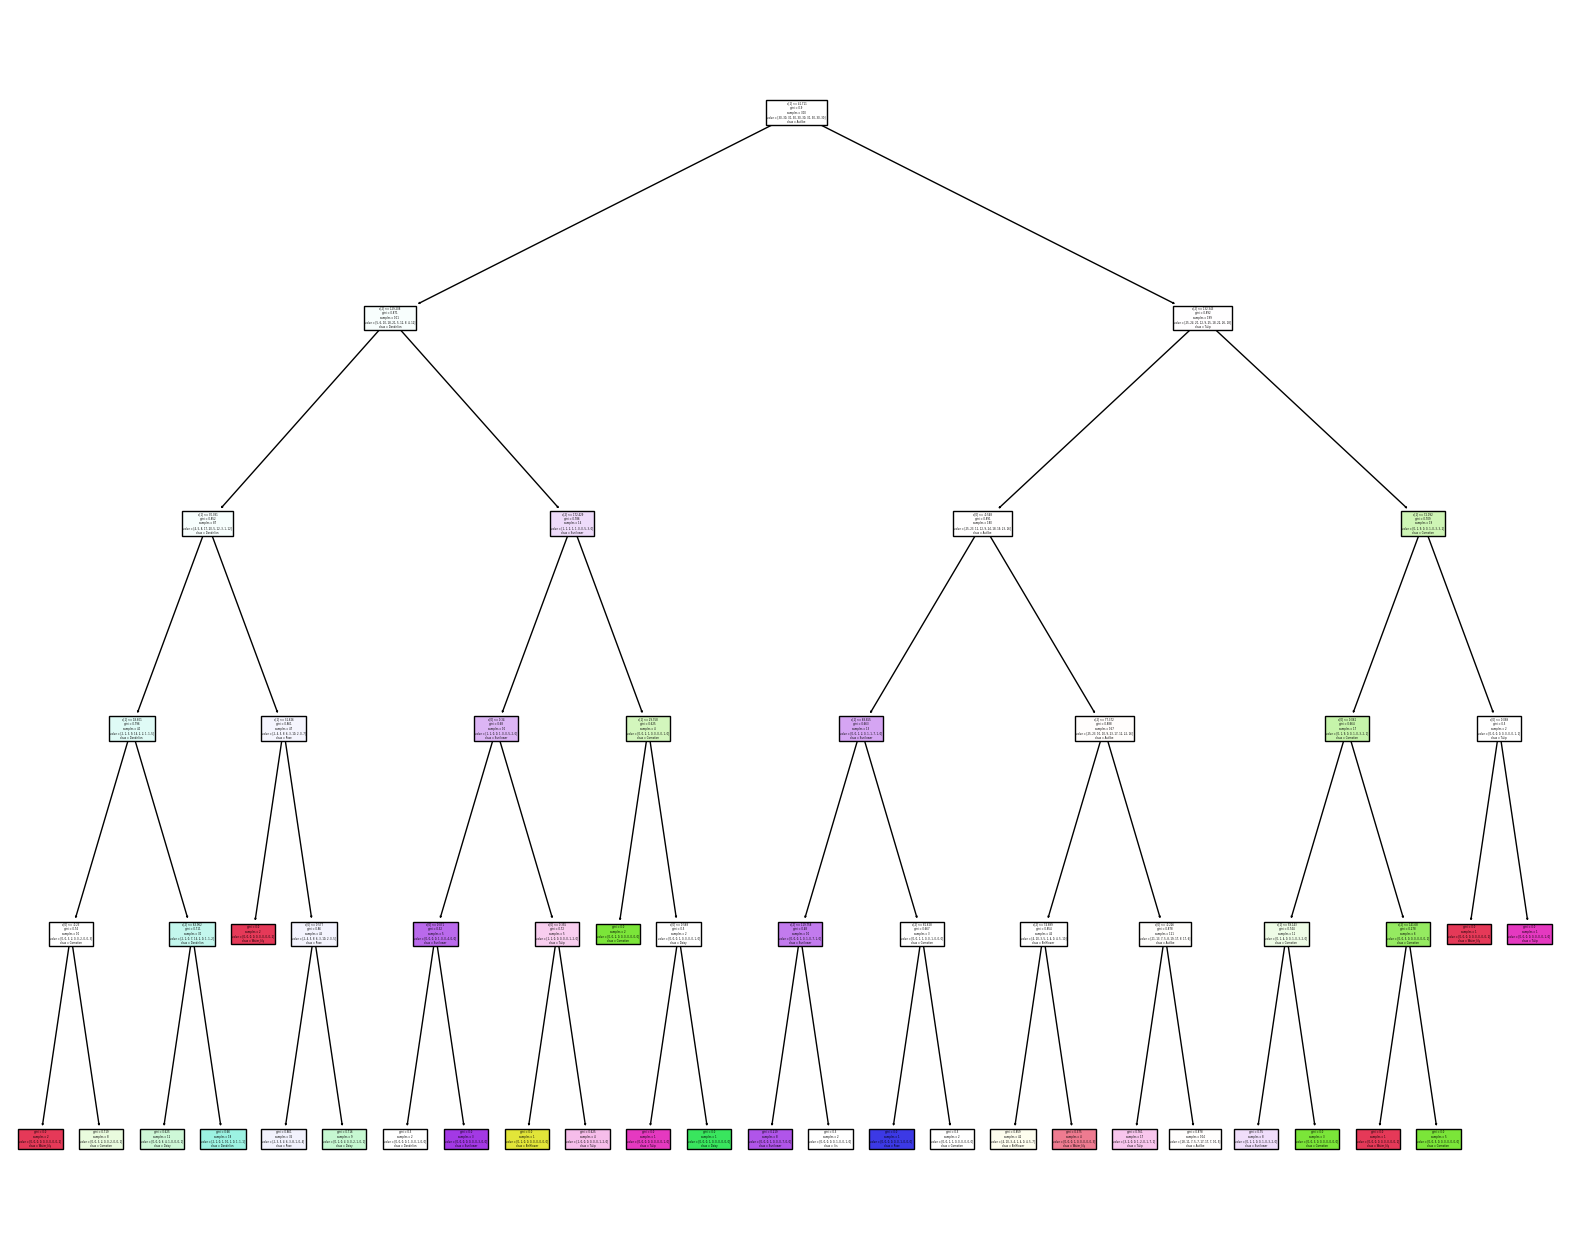

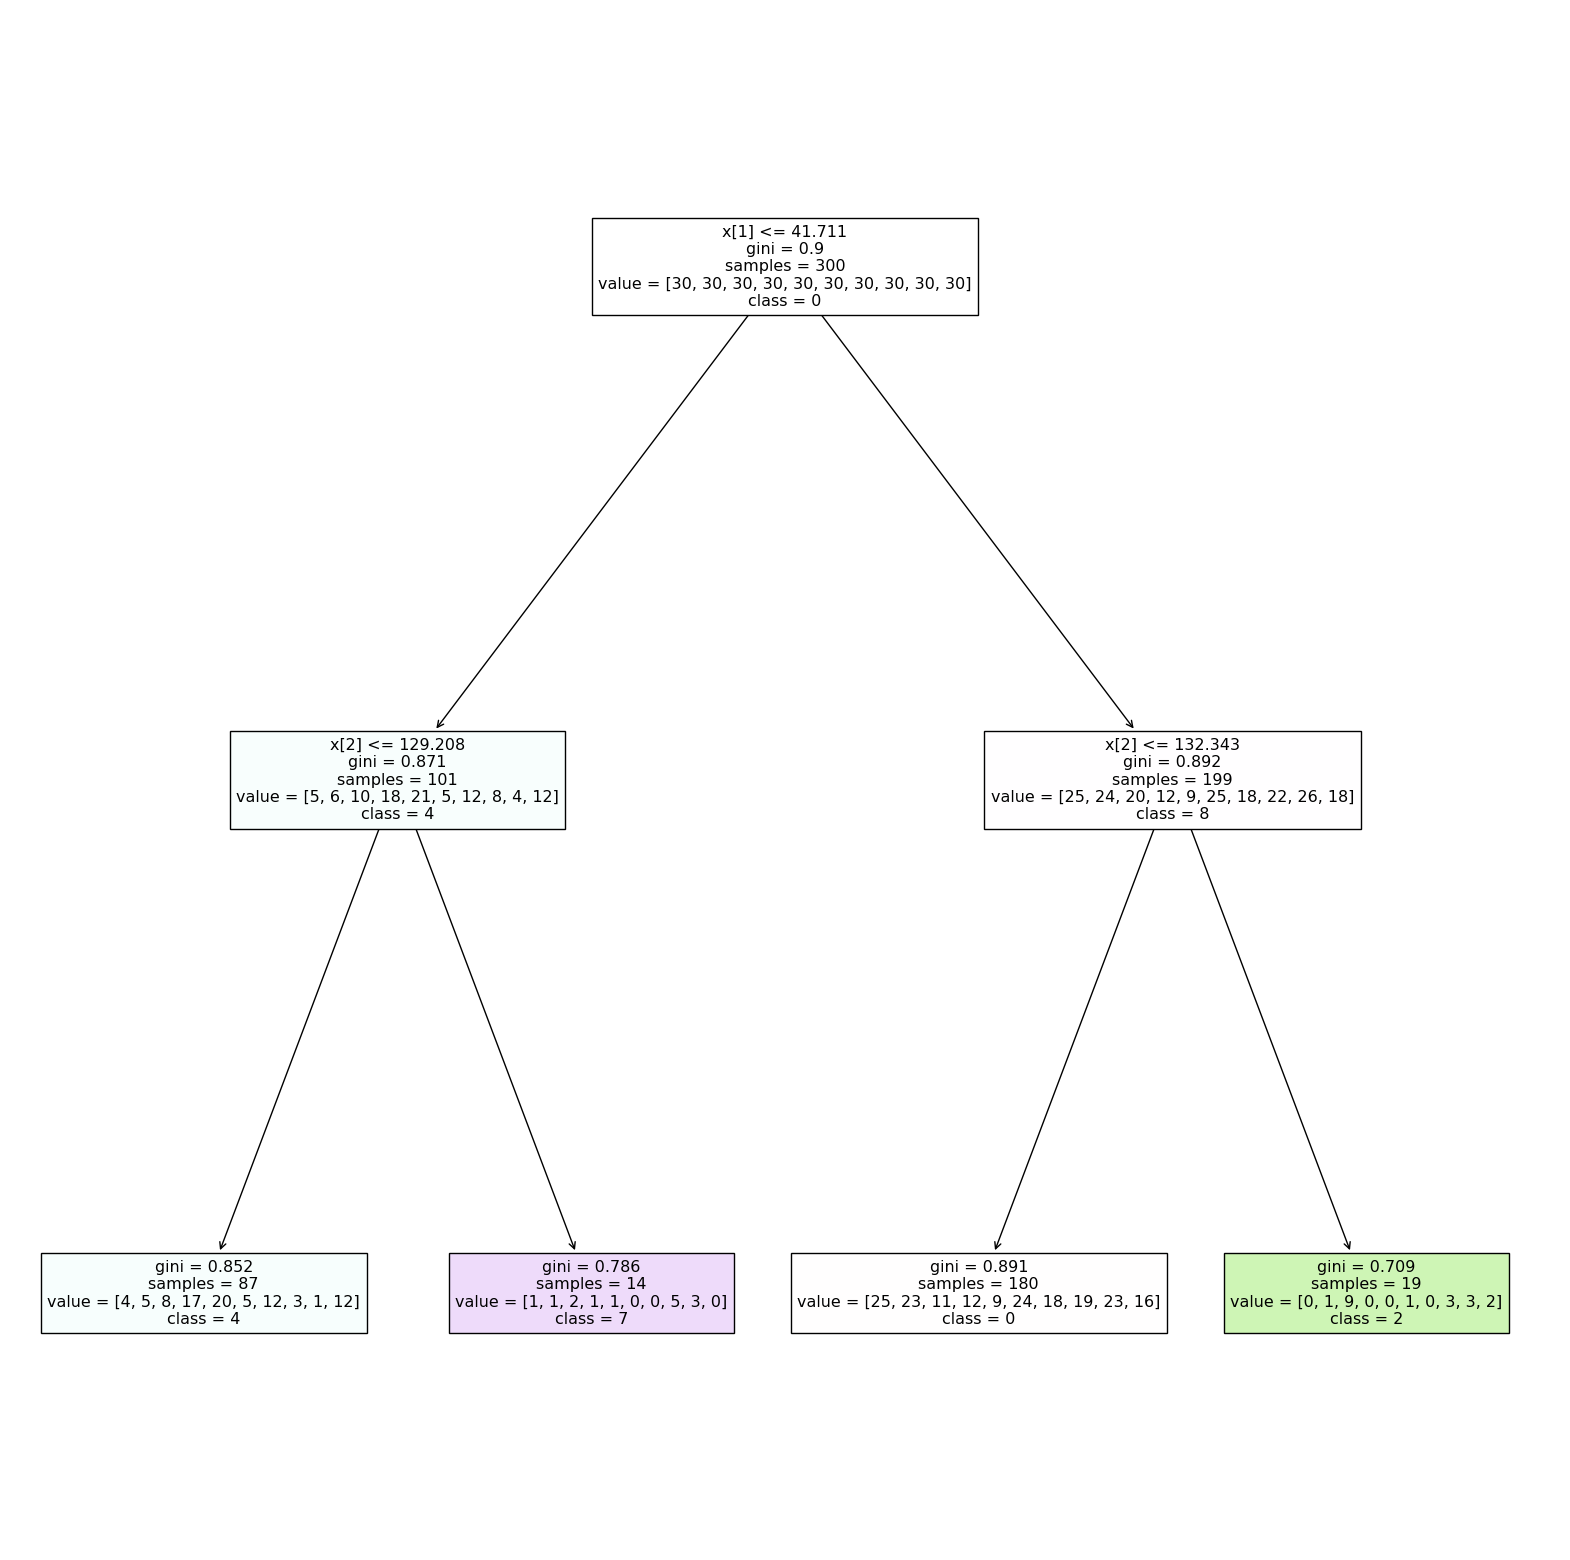

Best parameters {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score 0.13666666666666666
(300, 3)


In [4]:
#print("test7")
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

#--------------------FINAL PART--------------------------#

def extract_features_from_image(image):    
   
    flattened_image = image.flatten()
    return flattened_image

#This method is one of the feature used for extraction methods.
def extract_color_features(image):
    # Converting the image from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculating the mean and standard deviation of each color channel
    mean_color = np.mean(rgb_image, axis=(0, 1))
    std_color = np.std(rgb_image, axis=(0, 1))

    # Concatenating mean and standard deviation as features
    color_features = np.concatenate([mean_color, std_color])

    return color_features

# Function for extracting features
def extract_features(images):
    
    features = []

    for image in images:
        feature = extract_features_from_image(image)
        features.append(feature)

    return np.array(features)


def extract_features_ColorRgb(images):
    
    features = []
    for image in images:
        feature = extract_color_features(image)
        features.append(feature)

    return np.array(features)

# This method trains the    decision tree model
def train_decision_tree(train_features, train_labels,test_features,test_labels):
    
    model = DecisionTreeClassifier(max_depth=5)
    model.fit((train_features), train_labels)
    
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']

    plt.figure(figsize=(20,16))# set plot size (denoted in inches)
    tree.plot_tree(model,class_names=classes,filled=True)       
    y_train_pred = model.predict(train_features)
    y_test_pred = model.predict(test_features)    
    print(f'Train score {accuracy_score(y_train_pred,train_labels)}')
    print(f'Test score {accuracy_score(y_test_pred,test_labels)}')
                                                                               
    return model

# Function for evaluating the model
def evaluate_model(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')
    confusion = confusion_matrix(test_labels, predictions)
    return accuracy, precision, recall, f1, confusion

# This method prints the decision tree rules
def print_decision_tree_rules(model, feature_names):
    tree_rules = []
    tree_ = model.tree_

    def recurse(node):
        nonlocal tree_rules
        if tree_.feature[node] != -2:  # Check if not a leaf node
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            rule = f"{name} <= {threshold:.4f}"
            tree_rules.append(rule)
            recurse(tree_.children_left[node])

            rule = f"{name} > {threshold:.4f}"
            tree_rules.append(rule)
            recurse(tree_.children_right[node])
        else:
            tree_rules.append(f"Class {np.argmax(tree_.value[node])}")

    recurse(0)

    return tree_rules

"""

# Load your dataset and perform train/test split
# Replace the placeholder paths with the actual paths to your dataset
nameofclass = "astilbe"
train_images_path = "flower_photos/train/"+nameofclass
test_images_path = "flower_photos/test/"+nameofclass


def load_dataset(images_path):
     images = []
     labels = []

     for root, dirs, files in os.walk(images_path):
         for file in files:
             # Assuming image names are in the format "label_image_number.jpg"
             label = file.split("_")[0]  # Extract the label from the filename
             label = int(label)  # Convert the label to an integer if needed

             image_path = os.path.join(root, file)
             image = cv2.imread(image_path)  # Use OpenCV to read the image
             # You may need to resize or preprocess the image based on your requirements

             images.append(image)
             labels.append(label)

    return images, labels


#Load training data
train_images, train_labels = load_dataset(train_images_path)

#Load test data
test_images, test_labels = load_dataset(test_images_path)


"""
# This method is used for drawing confusion matrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

# Main Script
if __name__ == "__main__":
    
    # Step 1: Extract features for each image in the training set
    Laplaciantrain_features = extract_features(Train_Laplacian)
    Laplaciantest_features = extract_features(Tree_Laplacian)
    
    CannyEdgetrain_features = extract_features(Train_CannyEdge)
    CannyEdgetest_features = extract_features(Test_CannyEdge)
    
    RGBtrain_features = extract_features(Train_RGB)
    RGBtest_features = extract_features(Test_RGB)
    
    train_features = np.concatenate((Laplaciantrain_features, CannyEdgetrain_features, RGBtrain_features), axis=1)
    test_features = np.concatenate((Laplaciantest_features, CannyEdgetest_features, RGBtest_features), axis=1)
    
    # Step 2: Train your ID3 decision tree model with respect to your features
    model = train_decision_tree(train_features, train_labels,test_features,test_labels)
    
    # Print feature importances
    feature_importances = model.feature_importances_
    feature_names = ["Laplacian","CannyEdge","RGB"]  # Replace with actual feature names
    
    for feature_name, importance in zip(train_images, feature_importances):
        print(f"Feature: {feature_name}, Importance: {importance}")
        feature_names.append(feature_name)
    
    # Step 3: Compute and report accuracy, precision, recall, and F1 Score
    accuracy, precision, recall, f1, confusion = evaluate_model(model, test_features, test_labels)
    predictions = model.predict(test_features)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    num_pixels = len(train_features[0])
    ftNames = [f"Pixel{i}" for i in range(1, num_pixels + 1)]
    
    
    # Step 4: Write the rules of your best-performing decision tree model
    rules = print_decision_tree_rules(model, ftNames)
    for rule in rules:
        print(rule)

    
    # Step 5: Error Analysis for Classification
    # Find a few misclassified images and comment on why you think they were hard to classify
    
    misclassified_indices = np.where(test_labels != predictions)[0]
    for idx in misclassified_indices[:5]:  # Display the first 5 misclassified images
        print(f"Misclassified Image: {idx}")
        # Display the misclassified image and any additional information for analysis

    params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

    clf = tree.DecisionTreeClassifier()
    gcv = GridSearchCV(estimator=clf,param_grid=params)
    gcv.fit(train_features,train_labels)
    model = gcv.best_estimator_
    model.fit(train_features,train_labels)
    y_train_pred = model.predict(train_features)
    y_test_pred = model.predict(test_features)
    plt.figure(figsize=(20,20))
    classes = ['0','1','2','3','4','5','6','7','8','9','10']
    tree.plot_tree(model,class_names=classes,filled=True)
    plt.show()
    print(f'Best parameters {gcv.best_params_}')
    print(f'Best score {gcv.best_score_}')
    print(train_features.shape)
    
    
    """    
    pruned_tree = PrunedDecisionTree(max_depth=5)

    # Train the model
    pruned_tree.fit(train_features, train_labels)

    # Visualize the decision tree before pruning
    viz_before_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,
                                class_names=['0', '1'])
    viz_before_pruning.view()

    # Perform post-pruning
    pruned_tree.post_prune(train_features, train_labels)

    # Visualize the decision tree after pruning
    viz_after_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,
                                class_names=['0', '1'])
    viz_after_pruning.view()            
    """

#print("test8")

#----------------------------------------------END OF THE FINAL PART--------------------------------------------------------------#